In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

X = np.genfromtxt("glass_data.csv", delimiter=",", usecols=np.arange(1,9), skip_header=1)
y = np.genfromtxt("glass_data.csv", delimiter=",", usecols=10, skip_header=1)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [49]:
import math

class Error(Exception):
    """Base class for other exceptions"""
    pass

class largeKValue(Error):
    '''
    raised when K value exceeds threshold
    '''
    pass

class getKNearest:
    def __init__(self):
        self.minimum_dist = []
        self.minimum_dist_index = []

    def KNearest(self,distances, K):
        '''
        picks the first K minimum distances irrespetive of ties
        '''
        for i in range(K):
            self.minimum_dist.append(min(distances))
            self.minimum_dist_index.append(np.argmin(distances))
            distances.pop(self.minimum_dist_index[i])
        return getKNearest

class KNN:
    def __init__(self, K=5):
        self.model = []
        self.predicted_labels = []
        try:
            self.K = K
            if self.K>120:
                raise largeKValue
        except largeKValue:
            print("K exceeds maximum threshold of 120")
            
        
    def euclideanDistance(self,P1,P2):
        '''
        returns the Euclidean distance between two points
        '''
        return np.linalg.norm(P1-P2)
            

    def fit(self, X_train, y_train):
        '''
        creates the model from the training sets by combining 
        the X_train and the y_train datasets into a single dataset
        The last column of the model stores the label
        creates a N-dimensional model array
        size =  (no. of rows in X_test, no. of columns in X_test + no.of columns in y_test)
        '''
        self.__init__(self.K)
        rows = X_train.shape[0]
        columns = len(y_train.shape) + X_train.shape[1]
        self.model = np.ones((rows,columns))
        for i,x in enumerate(X_train):
            self.model[i] = self.model[i] * np.insert(x,len(x), np.array([y_train[i]]))
        return self.model
        
    def predict(self, X_test):
        '''
        predicts and returns the label for each test sample of in the test dataset
        if the labels are all having different values, the function selects the smallest
        '''
        test_sample_length = X_test.shape[1]
        for sample in X_test:
            #distance between the training sample from the training set 
            #and the test sample from the test set
            distances = [ self.euclideanDistance(training_sample[:test_sample_length], sample) 
                         for training_sample in self.model ]
            obj = getKNearest()
            obj.KNearest(distances, self.K)
            labels = [ self.model[i][-1] for i in obj.minimum_dist_index ]
            self.predicted_labels.append(max(set(labels), key = labels.count))
        return self.predicted_labels
    
    def score(self, y_test):
        '''
        compares the predicted labels and the actual test set labels
        returns a fraction of the correctly predicted labels
        '''
        score=[]
        score = [ self.predicted_labels[i] == y_test[i] for i in range(len(y_test)) 
                 if self.predicted_labels[i] == y_test[i] ]
        return len(score)/len(y_test)

In [58]:
_3nn = KNN(K=3)
_3nn.fit(X_train, y_train)
y_pred = _3nn.predict(X_test)
score = _3nn.score(y_test)
print("Test set accurancy 5NN: {}% ".format(score*100))
error = np.mean(y_pred != y_test)
print("Test Error Rate: {}%".format(error*100))

Test set accurancy 5NN: 64.81481481481481% 
Test Error Rate: 35.18518518518518%


In [57]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Test set accuracy for 5NN: {}%".format(knn.scorere(X_test,y_test)*100))
print("Test Error Rate: {}%".format(np.mean(knn.predict(X_test) != y_test)*100))

Test set accuracy for 5NN: 74.07407407407408%
Test Error Rate: 25.925925925925924%


In [37]:
errors,scores, accuracy = [],[], []
for i in range(1, 120):
    KNearest = KNN(K=i)
    KNearest.fit(X_train, y_train)
    prediction_i = KNearest.predict(X_test)
    scores.append(KNearest.score(y_test))
    errors.append(np.mean(prediction_i != y_test))
    accuracy.append(1-np.mean(prediction_i != y_test))

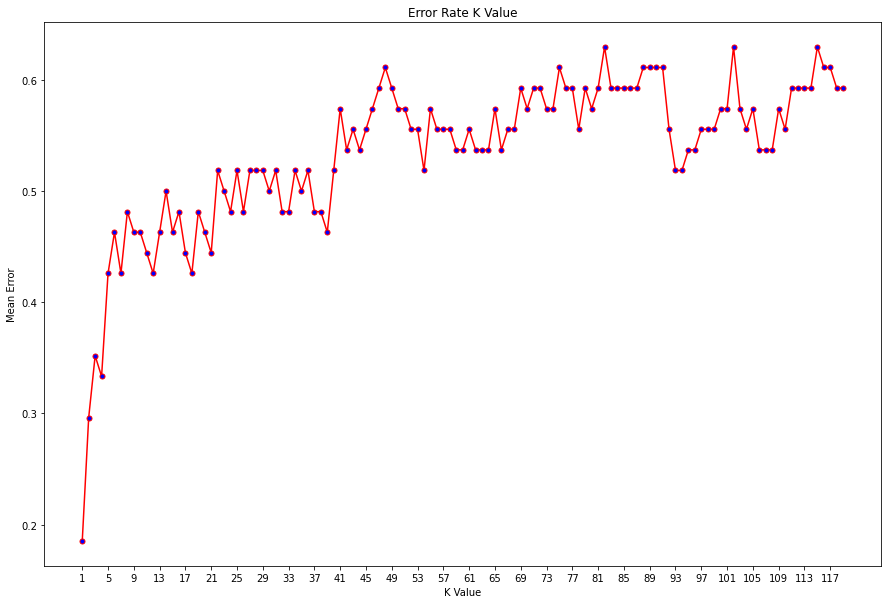

In [59]:
plt.figure(figsize=(15,10))
plt.plot(range(1, 120), errors, color='red', marker='o', markerfacecolor='blue', markersize=5)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.xticks(np.arange(1,121,4))
plt.show()